# Introduction

This notebook is an implementation of Jón Daníelsson's _Financial Risk Forecasting_ (Wiley, 2011) in MATLAB 2022a, with annotations and introductory examples. The introductory examples (Appendix) are similar to Appendix C in the original book.

The following code has been adapted from the original, implemented in MATLAB 2022a. Occasional lines of code which require different syntax to run in MATLAB 2022a are also noted in trailing comments.

'Econometrics', 'Optimization' and 'Statistics and Machine learning' toolboxes are used by this script. 

Bullet point numbers correspond to the MATLAB Listing numbers in the original book, referred to henceforth as _FRF_.

More details can be found at the book website: https://www.financialriskforecasting.com/

Last updated: June 2022

Copyright 2011-2020 Jón Daníelsson. This code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This code is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. The GNU General Public License is available at: https://www.gnu.org/licenses/.

<a id='top'></a>
## Table of Contents 
[Chapter 0. Appendix - Introduction](#0) <br>
[Chapter 1. Financial Markets, Prices and Risk](#1) <br>
[Chapter 2. Univariate Volatility Modeling](#2) <br>
[Chapter 3. Multivariate Volatility Models](#3) <br>
[Chapter 4. Risk Measures](#4) <br>
[Chapter 5. Implementing Risk Forecasts](#5) <br>
[Chapter 6. Analytical Value-at-Risk for Options and Bonds](#6) <br>
[Chapter 7. Simulation Methods for VaR for Options and Bonds](#7) <br>
[Chapter 8. Backtesting and Stress Testing](#8) <br>
[Chapter 9. Extreme Value Theory](#9) <br>

<a id='0'></a>
***

# Appendix: An Introduction to MATLAB

Created in MATLAB 2022a (June 2022)

-  M.1: Entering and Printing Data
-  M.2: Vectors, Matrices and Sequences
-  M.3: Importing Data (to be updated)
-  M.4: Basic Summary Statistics
-  M.5: Calculating Moments
-  M.6: Basic Matrix Operations
-  M.7: Statistical Distributions
-  M.8: Statistical Tests
-  M.9: Time Series
-  M.10: Loops and Functions
-  M.11: Basic Graphs
-  M.12: Miscellaneous Useful Functions

In [1]:
% Entering and Printing Data
% Listing M.1
% Last updated June 2018
%
%

x = 10;             % assign x the value 10, silencing output print with ;
disp(x)             % display x

    10




In [2]:
% Vectors, Matrices and Sequences
% Listing M.2
% Last updated June 2018
%
%

y = [1,3,5,7,9]            % lists are denoted by square brackets

y(3)                       % calling 3rd element (MATLAB indices start at 1)

size(y)                    % shows that y is 1 x 5 (a row vector, by default)

length(y)                  % as expected, y has length 5

v = nan(2,3)               % fill a 2 x 3 matrix with NaN values

size(v)                    % as expected, v is size (2,3)

w = repmat([1,2,3]', 2, 3) % repeats matrix twice by rows, thrice by columns

s = 1:10                   % s is a list of integers from 1 to 10 inclusive


y =

     1     3     5     7     9


ans =

     5


ans =

     1     5


ans =

     5


v =

   NaN   NaN   NaN
   NaN   NaN   NaN


ans =

     2     3


w =

     1     1     1
     2     2     2
     3     3     3
     1     1     1
     2     2     2
     3     3     3


s =

     1     2     3     4     5     6     7     8     9    10




In [3]:
% Basic Summary Statistics
% Listing M.3
% Last updated June 2022
%
%

y = [3.14; 15; 9.26; 5];    % List with semicolons is a column vector

sum(y)         % sum of all elements of y
prod(y)        % product of all elements of y
max(y)         % maximum value of y
min(y)         % minimum value of y
range(y)       % difference between max and min value of y
mean(y)        % arithmetic mean
median(y)      % median
var(y)         % variance
cov(y)         % covar matrix = variance for single vector
corrcoef(y)    % corr matrix = [1] for single vector
sort(y)        % sorting in ascending order
log(y)         % natural log


ans =

   32.4000


ans =

   2.1807e+03


ans =

    15


ans =

    3.1400


ans =

   11.8600


ans =

    8.1000


ans =

    7.1300


ans =

   27.7224


ans =

   27.7224


ans =

     1


ans =

    3.1400
    5.0000
    9.2600
   15.0000


ans =

    1.1442
    2.7081
    2.2257
    1.6094




In [4]:
% Calculating Moments
% Listing M.4
% Last updated June 2018
%
%

mean(y)      % mean
var(y)       % variance
std(y)       % unbiased standard deviation, by default
skewness(y)  % skewness
kurtosis(y)  % kurtosis


ans =

    8.1000


ans =

   27.7224


ans =

    5.2652


ans =

    0.4700


ans =

    1.7153




In [5]:
% Basic Matrix Operations
% Listing M.5
% Last updated June 2018
%
%

z = [1, 2; 3, 4]  % z is a 2 x 2 matrix (Note the use of ; as row separator)
x = [1, 2]        % x is a 1 x 2 matrix

%% Note: z * x is undefined since the two matrices are not conformable

z * x'            % this evaluates to a 2 x 1 matrix

vertcat(z,x)      % "stacking" z and x vertically
horzcat(z,x')     % "stacking z and x' horizontally

%% Note: dimensions must match along the combining axis)


z =

     1     2
     3     4


x =

     1     2


ans =

     5
    11


ans =

     1     2
     3     4
     1     2


ans =

     1     2     1
     3     4     2




In [6]:
% Statistical Distributions
% Listing M.6
% Last updated June 2018
%
%


q = -3:1:3                       % specify a set of values

p = 0.1:0.1:0.9                  % specify a set of probabilities

norminv(p, 0, 1)                 % element-wise inverse Normal quantile

tcdf(q, 4)                       % element-wise cdf under Student-t(4)

chi2pdf(q, 2)                    % element-wise pdf under Chisq(2)

%% One can also obtain pseudorandom samples from distributions

x = trnd(5, 100, 1);             % Sampling 100 times from t dist with 5 df

y = normrnd(0, 1, 100, 1);       % Sampling 50 times from a standard normal 

%% Given sample data, we can also obtain MLE estimates of distribution parameters:

res = fitdist(x, "Normal")       % Fitting x to normal dist


q =

    -3    -2    -1     0     1     2     3


p =

    0.1000    0.2000    0.3000    0.4000    0.5000    0.6000    0.7000    0.8000    0.9000


ans =

   -1.2816   -0.8416   -0.5244   -0.2533         0    0.2533    0.5244    0.8416    1.2816


ans =

    0.0200    0.0581    0.1870    0.5000    0.8130    0.9419    0.9800


ans =

         0         0         0    0.5000    0.3033    0.1839    0.1116


res = 

  NormalDistribution

  Normal distribution
       mu = 0.146605   [-0.155625, 0.448836]
    sigma =  1.52317   [1.33736, 1.76943]




In [7]:
% Statistical Tests
% Listing M.7
% Last updated July 2020
%
%

x = trnd(5, 500, 1);                    % Create hypothetical dataset x

[h1, p1, jbstat] = jbtest(x)            % Jarque-Bera test for normality

[h2, p2, lbstat] = lbqtest(x,'lags',20) % Ljung-Box test for serial correlation - Needs Econometrics Toolbox

> In jbtest (line 136)

h1 =

     1


p1 =

   1.0000e-03


jbstat =

  398.3104


h2 =

  logical

   0


p2 =

    0.1588


lbstat =

   26.2154




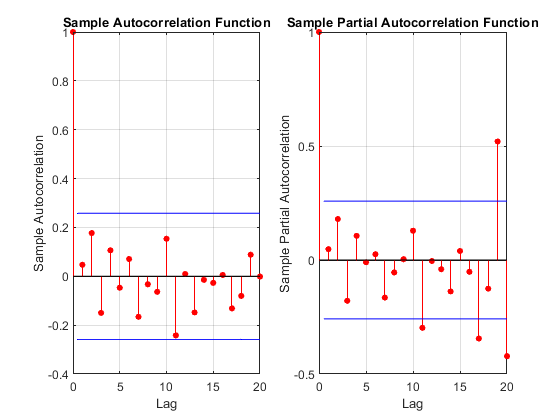

In [8]:
% Time Series
% Listing M.8
% Last updated June 2018
%
%

x = trnd(5, 60, 1); % Create hypothetical dataset x

subplot(1,2,1)
autocorr(x, 20)     % autocorrelation for lags 1:20
subplot(1,2,2)
parcorr(x,20)       % partial autocorrelation for lags 1:20

In [9]:
% Loops and Functions
% Listing M.9
% Last updated June 2018
%
%

%% For loops

for i = 3:7        % iterates through [3,4,5,6,7]
    i^2  
end

%% If-else loops

X = 10;

if (rem(X,3) == 0)
    disp("X is a multiple of 3")
else 
    disp("X is not a multiple of 3")
end
    
%% Functions (example: a simple excess kurtosis function)
%% NOTE: in MATLAB, functions can be defined in 2 locations:
%% 1) in a separate file (e.g. excess_kurtosis.m in this case) in the workspace
%% 2) in the same file as the rest of the code, BUT at the end of the file

%% function k = excess_kurtosis(x, excess) 
%%     if nargin == 1                      % if there is only 1 argument
%%         excess = 3;                     % set excess = 3
%%     end                                 % this is how optional param excess is set
%%     m4 = mean((x-mean(x)).^4);
%%     k = m4/(std(x)^4) - excess;
%% end  


ans =

     9


ans =

    16


ans =

    25


ans =

    36


ans =

    49

X is not a multiple of 3



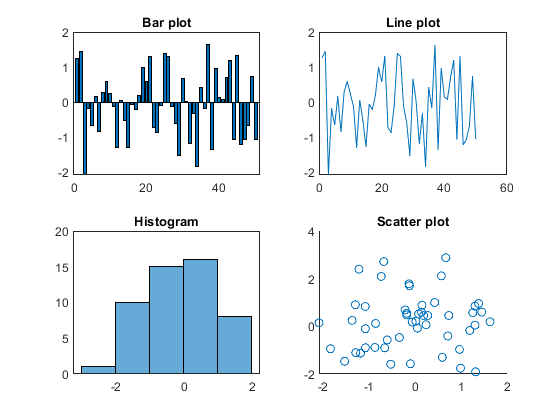

In [10]:
% Basic Graphs
% Listing M.10
% Last updated July 2020
%
%

y = normrnd(0, 1, 50, 1);
z = trnd(4, 50, 1);

subplot(2,2,1)
bar(y)            % bar plot
title("Bar plot")
subplot(2,2,2)
plot(y)           % line plot
title("Line plot")
subplot(2,2,3)
histogram(y)      % histogram
title("Histogram")
subplot(2,2,4)
scatter(y,z)      % scatter plot
title("Scatter plot")

In [11]:
% Miscellaneous Useful Functions
% Listing M.11
% Last updated June 2018
%
%

%% Convert objects from one type to another with int8() etc
%% To check type, use isfloat(object), isinteger(object) and so on
x = 8.0;
isfloat(x)
x = int8(x);
isinteger(x)


ans =

  logical

   1


ans =

  logical

   1




<a id='1'></a>
***

# Chapter 1: Financial Markets, Prices and Risk

-  1.1/1.2: Loading hypothetical stock prices, converting to returns, plotting returns
-  1.3/1.4: Summary statistics for returns timeseries
-  1.5/1.6: Autocorrelation function (ACF) plots, Ljung-Box test
-  1.7/1.8: Quantile-Quantile (QQ) plots
-  1.9/1.10: Correlation matrix between different stocks

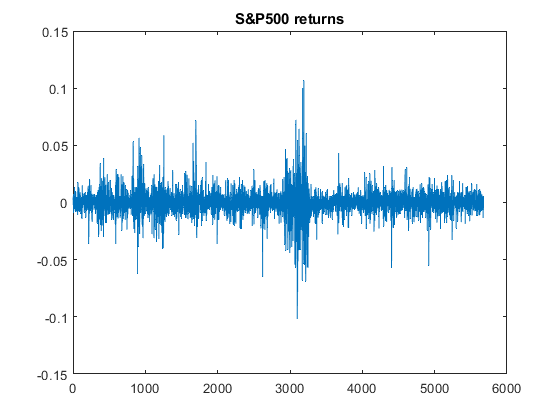

In [12]:
% Download S&P 500 data in MATLAB
% Listing 1.2
% Last updated July 2020
%
%

price = csvread('index.csv', 1, 0);
y=diff(log(price)); % calculate returns

plot(y)             % plot returns
title("S&P500 returns")


% END


In [13]:
% Sample statistics in MATLAB
% Listing 1.4
% Last updated July 2020
%
%

mean(y)
std(y)
min(y)
max(y)
skewness(y)
kurtosis(y)
[h,pValue,stat]=jbtest(y);

%% NOTE: in MATLAB some functions require name-value pairs
%% e.g. [h,pValue,stat]=jbtest(y);


ans =

   2.5816e-04


ans =

    0.0100


ans =

   -0.1020


ans =

    0.1067


ans =

    0.1526


ans =

   16.9812

> In jbtest (line 136)



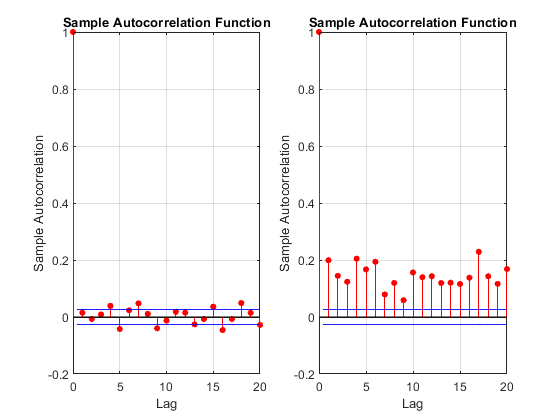

In [14]:
% ACF plots and the Ljung-Box test in MATLAB
% Listing 1.6
% Last updated July 2020
%
%

%% subplots here are just for ease of visualization

subplot(1,2,1)
autocorr(y, 20)
subplot(1,2,2)
autocorr(y.^2, 20)

[h,pValue,stat]=lbqtest(y,'lags',20);          
[h,pValue,stat]=lbqtest(y.^2,'lags',20);

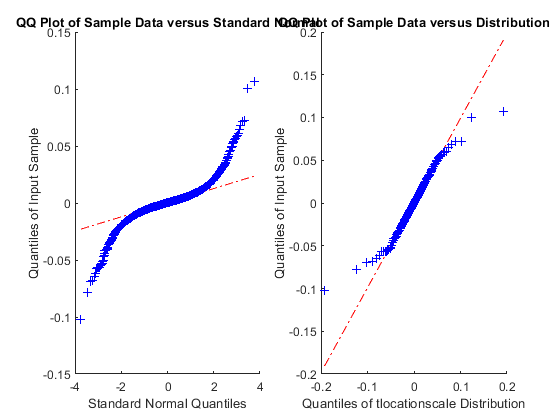

In [15]:
% QQ plots in MATLAB
% Listing 1.8
% Last updated 2011
%
%

%% subplots here are just for ease of visualization

subplot(1,2,1)
qqplot(y)
subplot(1,2,2)
qqplot(y, fitdist(y,'tLocationScale'))

In [16]:
% Download stock prices in MATLAB
% Listing 1.10
% Last updated 2011
%
%

price = csvread('stocks.csv', 1, 0);
y=diff(log(price));
corr(y) % correlation matrix


ans =

    1.0000    0.2297    0.2126
    0.2297    1.0000    0.1451
    0.2126    0.1451    1.0000




<a id='2'></a>
***

# Chapter 2: Univariate Volatility Modelling

-  2.1/2.2: GARCH and t-GARCH estimation
-  2.3/2.4: APARCH estimation

In [17]:
help tarch

  TARCH(P,O,Q) parameter estimation with different error distributions:
  Normal, Students-T, Generalized Error Distribution, Skewed T
  Estimation of ARCH or GARCH models if o=0 and tarch_type=2
  Estimation of TARCH or GJR asymmetric models if o>0 and tarch_type=1 or 2
 
  USAGE:
    [PARAMETERS] = tarch(EPSILON,P,O,Q)
    [PARAMETERS,LL,HT,VCVROBUST,VCV,SCORES,DIAGNOSTICS] = 
                                    tarch(EPSILON,P,O,Q,ERROR_TYPE,TARCH_TYPE,STARTINGVALS,OPTIONS)
 
  INPUTS:
    EPSILON      - A column of mean zero data
    P            - Positive, scalar integer representing the number of symmetric innovations
    O            - Non-negative scalar integer representing the number of asymmetric innovations (0
                     for symmetric processes)    
    Q            - Non-negative, scalar integer representing the number of lags of conditional
                     variance (0 for ARCH) 
    ERROR_TYPE   - [OPTIONAL] The error distribution used, valid types are:
  

In [18]:
% ARCH and GARCH estimation in MATLAB
% Listing 2.2
% Last updated June 2018
%
%

p = csvread('index.csv', 1, 0);

y=diff(log(p))*100;
y=y-mean(y);

%% We multiply returns by 100 and de-mean them

tarch(y,1,0,0);              % ARCH(1)
tarch(y,4,0,0);              % ARCH(4)
tarch(y,4,0,1);              % GARCH(4,1)
tarch(y,1,0,1);              % GARCH(1,1)
tarch(y,1,0,1,'STUDENTST');  % t-GARCH(1,1)


____________________________________________________________
   Diagnostic Information

Number of variables: 2

Functions 
Objective:                            tarch_likelihood
Gradient:                             finite-differencing
Hessian:                              bfgs
 

Algorithm selected
   quasi-newton


____________________________________________________________
   End diagnostic information
                                                        First-order 
 Iteration  Func-count       f(x)        Step-size       optimality
     0           3          7868.18                           974
     1           9          7687.07    0.000391319           48.7  
     2          15          7679.24             10           39.5  
     3          18          7671.32              1           46.3  
     4          21          7670.68              1           14.9  
     5          24          7670.62              1          0.659  
     6          27          7670.62           

In [19]:
% Advanced ARCH and GARCH estimation in MATLAB
% Listing 2.4
% Last updated August 2016
%
%

aparch(y,1,1,1);              % APARCH(1,1)
aparch(y,2,2,1);              % APARCH(2,1)
aparch(y,1,1,1,'STUDENTST');  % t-APARCH(1,1)


____________________________________________________________
   Diagnostic Information

Number of variables: 5

Functions 
Objective:                            aparch_likelihood
Gradient:                             finite-differencing
Hessian:                              bfgs
 

Algorithm selected
   quasi-newton


____________________________________________________________
   End diagnostic information
                                                        First-order 
 Iteration  Func-count       f(x)        Step-size       optimality
     0           6          7001.41                          44.2
     1          18          6998.23     0.00282922           70.3  
     2          24          6993.16              1           74.2  
     3          36          6981.98            0.5           91.3  
     4          42          6976.72              1           52.2  
     5          48          6974.16              1           23.8  
     6          54          6973.62          

<a id='3'></a>
***

# Chapter 3: Multivariate Volatility Models

-  3.1/3.2: Loading hypothetical stock prices
-  3.3/3.4: EWMA estimation
-  3.5/3.6: OGARCH estimation (unavailable as of June 2018)
-  3.7/3.8: DCC estimation (unavailable as of June 2018)
-  3.9/3.10: Comparison of EWMA, OGARCH, DCC (unavailable as of June 2018)

In [20]:
% Download stock prices in MATLAB
% Listing 3.2
% Last updated August 2016
%
%

p = csvread('stocks.csv',1,0);
p = p(:,[1,2]); % consider first two stocks

y = diff(log(p))*100; % convert prices to returns
y(:,1)=y(:,1)-mean(y(:,1)); % subtract mean
y(:,2)=y(:,2)-mean(y(:,2));
T = length(y);

In [21]:
% EWMA in MATLAB
% Listing 3.4
% Last updated June 2018
%
%

%% create a matrix to hold covariance matrix for each t
EWMA = nan(T,3); 
lambda = 0.94;
S = cov(y);                 % initial (t=1) covar matrix
EWMA(1,:) = S([1,4,2]);     % extract var and covar
for i = 2:T                 % loop though the sample
    S = lambda*S+(1-lambda)* y(i-1,:)'*y(i-1,:);
    EWMA(i,:) = S([1,4,2]); % convert matrix to vector
end
EWMArho = EWMA(:,3)./sqrt(EWMA(:,1).*EWMA(:,2)); % calculate correlations

In [22]:
% OGARCH in MATLAB
% Listing 3.6
% Last updated August 2016
%
%

[par, Ht] = o_mvgarch(y,2, 1,1,1);
Ht = reshape(Ht,4,T)';
%% Ht comes from o_mvgarch as a 3D matrix, this transforms it into a 2D matrix
OOrho = Ht(:,3) ./ sqrt(Ht(:,1) .* Ht(:,4));

%% OOrho is a vector of correlations

In [ ]:
% DCC in MATLAB
% Listing 3.8
% Last updated June 2022
%
%

%%The function 'dcc' in MFE toolbox currently cannot work in MATLAB R2022a. 
%%The function 'dcc' use one MATLAB Optimization toolbox function 'fmincon'.
%%The changes of 'fmincon' cause this problem.
%%This block can work on Optimization 8.3

[p, lik, Ht] = dcc(y,1,1,1,1);
Ht = reshape(Ht,4,T)';
DCCrho = Ht(:,3) ./ sqrt(Ht(:,1) .* Ht(:,4));

%% DCCrho is a vector of correlations

In [ ]:
% Correlation comparison in MATLAB
% Listing 3.10
% Last updated June 2018
%
%

plot([EWMArho,OOrho,DCCrho])
legend('EWMA','DCC','OGARCH','Location','SouthWest')

<a id='4'></a>
***

# Chapter 4: Risk Measures

-  4.1/4.2: Expected Shortfall (ES) estimation under normality assumption

In [23]:
% ES in MATLAB
% Listing 4.2
% Last updated August 2016
%
%

p = [0.5,0.1,0.05,0.025,0.01,0.001];
VaR = -norminv(p)
ES = normpdf(norminv(p))./p


VaR =

         0    1.2816    1.6449    1.9600    2.3263    3.0902


ES =

    0.7979    1.7550    2.0627    2.3378    2.6652    3.3671




<a id='5'></a>
***

# Chapter 5: Implementing Risk Forecasts

-  5.1/5.2: Loading hypothetical stock prices, converting to returns
-  5.3/5.4: Univariate HS Value at Risk (VaR)
-  5.5/5.6: Multivariate HS VaR
-  5.7/5.8: Univariate ES VaR
-  5.9/5.10: Normal VaR
-  5.11/5.12: Portfolio Normal VaR
-  5.13/5.14: Student-t VaR (unavailable as of June 2018)
-  5.15/5.16: Normal ES VaR
-  5.17/5.18: Direct Integration Normal ES VaR
-  5.19/5.20: MA Normal VaR
-  5.21/5.22: EWMA VaR
-  5.23/5.24: Two-asset EWMA VaR
-  5.25/5.26: GARCH(1,1) VaR

In [24]:
% Download stock prices in MATLAB
% Listing 5.2
% Last updated July 2020
%
%

stocks = csvread('stocks.csv',1,0);
p1 = stocks(:,1);             % consider first two stocks
p2 = stocks(:,2); 

y1=diff(log(p1));             % convert prices to returns
y2=diff(log(p2));
y=[y1 y2];
T=length(y1);
value = 1000;                 % portfolio value
p = 0.01;                     % probability

In [25]:
% Univariate HS VaR in MATLAB
% Listing 5.4
% Last updated July 2020
%
%

ys = sort(y1);   % sort returns
op = ceil(T*p);  % p percent smallest, rounded up to meet VaR probability requirement
VaR1 = -ys(op)*value


VaR1 =

   17.4982




In [26]:
% Multivariate HS VaR in MATLAB
% Listing 5.6
% Last updated 2011
%
%

w = [0.3; 0.7];    % vector of portfolio weights
yp = y*w;          % portfolio returns
yps = sort(yp);
VaR2 = -yps(op)*value


VaR2 =

   18.7263




In [27]:
% Univariate ES in MATLAB
% Listing 5.8
% Last updated 2011
%
%

ES1 = -mean(ys(1:op))*value


ES1 =

   22.5634




In [28]:
% Normal VaR in MATLAB
% Listing 5.10
% Last updated 2011
%
%

sigma = std(y1); % estimate volatility
VaR3 = -sigma * norminv(p) * value


VaR3 =

   14.9496




In [29]:
% Portfolio normal VaR in MATLAB
% Listing 5.12
% Last updated 2011
%
%

sigma = sqrt(w' * cov(y) * w); % portfolio volatility
VaR4 = - sigma * norminv(p) *  value


VaR4 =

   17.0411




In [30]:
% Student-t VaR in MATLAB
% Listing 5.14
% Last updated 2011
%
%

scy1=y1*100;          % scale the returns
res=mle(scy1,'distribution','tlocationscale');
sigma1 = res(2)/100;  % rescale the volatility
nu = res(3);
VaR5 = - sigma1 * tinv(p,nu) * value


VaR5 =

   17.1234




In [31]:
% Normal ES in MATLAB
% Listing 5.16
% Last updated June 2018
%
%

sigma = std(y1);
ES2=sigma*normpdf(norminv(p))/p * value


ES2 =

   17.1272




In [32]:
% Direct integration ES in MATLAB
% Listing 5.18
% Last updated 2011
%
%

VaR = -norminv(p);
ES = -sigma*quad(@(q) q.*normpdf(q),-6,-VaR)/p*value


ES =

   17.1266




In [33]:
% MA normal VaR in MATLAB
% Listing 5.20
% Last updated June 2018
%
%

WE=20;
for t=T-5:T
    t1=t-WE+1;
    window=y1(t1:t);  % estimation window
    sigma=std(window);
    VaR6 = -sigma * norminv(p) * value
end


VaR6 =

   16.0505


VaR6 =

   16.1491


VaR6 =

   18.8543


VaR6 =

   18.8821


VaR6 =

   16.2305


VaR6 =

   16.1698




In [34]:
% EWMA VaR in MATLAB
% Listing 5.22
% Last updated 2011
%
%

lambda = 0.94;	
s11 = var(y1(1:30)); % initial variance
for t = 2:T	
    s11 = lambda * s11  + (1-lambda) * y1(t-1)^2;
end
VaR7 = -norminv(p) * sqrt(s11) * value 


VaR7 =

   16.7534




In [35]:
% Two-asset EWMA VaR in MATLAB
% Listing 5.24
% Last updated 2011
%
%

s = cov(y);               % initial covariance
for t = 2:T
    s = lambda * s +  (1-lambda) * y(t-1,:)' * y(t-1,:);
end
sigma = sqrt(w' * s * w); % portfolio vol
VaR8 = - sigma * norminv(p) * value 


VaR8 =

   20.5036




In [36]:
% GARCH in MATLAB
% Listing 5.26
% Last updated August 2016
%
%

[parameters,ll,ht]=tarch(y1,1,0,1);
omega = parameters(1)
alpha = parameters(2)
beta = parameters(3)
sigma2 = omega + alpha*y1(end)^2 + beta*ht(end) % calc sigma2 for t+1
VaR9 = -sqrt(sigma2) * norminv(p) * value 


____________________________________________________________
   Diagnostic Information

Number of variables: 3

Functions 
Objective:                            tarch_likelihood
Gradient:                             finite-differencing
Hessian:                              bfgs
 

Algorithm selected
   quasi-newton


____________________________________________________________
   End diagnostic information
                                                        First-order 
 Iteration  Func-count       f(x)        Step-size       optimality
     0           4         -20893.3                          31.2
     1          12         -20895.9     0.00481557           15.9  
     2          16           -20897              1             10  
     3          20         -20898.6              1           7.49  
     4          28         -20900.8             10           13.9  
     5          32         -20902.8              1           14.4  
     6          36         -20903.6           

<a id='6'></a>
***

# Chapter 6: Analytical Value-at-Risk for Options and Bonds

-  6.1/6.2: Black-Scholes function definition
-  6.3/6.4: Black-Scholes option price calculation example

In [ ]:
% Black-Scholes function in MATLAB
% Listing 6.2
% Last updated 2011
%
%

%% To run this code block in Jupyter notebook:
%% delete all lines above the line with file bs.m, then run




%%file bs.m
function  res = bs(K,P,r,sigma,T)
	d1 = (log(P./K)+(r+(sigma^2)/2)*T)./(sigma*sqrt(T));
	d2 = d1 - sigma*sqrt(T);
	res.Call = P.*normcdf(d1,0,1)-K.*exp(-r*T).*normcdf(d2,0,1);
	res.Put = K.*exp(-r*T).*normcdf(-d2,0,1)-P.*normcdf(-d1,0,1);
	res.Delta.Call = normcdf(d1,0,1);
	res.Delta.Put = res.Delta.Call -1;
	res.Gamma = normpdf(d1,0,1)./(P*sigma*sqrt(T));
end

In [37]:
% Black-Scholes in MATLAB
% Listing 6.4
% Last updated 2011
%
%

f=bs(90,100,0.05,0.2,0.5)


f = 

  struct with fields:

     Call: 13.4985
      Put: 1.2764
    Delta: [1x1 struct]
    Gamma: 0.0172




<a id='7'></a>
***

# Chapter 7: Simulation Methods for VaR for Options and Bonds

-  7.1/7.2: Plotting normal distribution transformation
-  7.3/7.4: Random number generation from Uniform(0,1), Normal(0,1)
-  7.5/7.6: Bond pricing using yield curve
-  7.7/7.8: Yield curve simulations
-  7.9/7.10: Bond price simulations
-  7.11/7.12: Black-Scholes analytical pricing of call
-  7.13/7.14: Black-Scholes Monte Carlo simulation pricing of call
-  7.15/7.16: Option density plots
-  7.17/7.18: VaR simulation of portfolio with only underlying
-  7.19/7.20: VaR simulation of portfolio with only call
-  7.21/7.22: VaR simulation of portfolio with call, put and underlying
-  7.23/7.24: Simulated two-asset returns
-  7.25/7.26: Two-asset portfolio VaR
-  7.27/7.28: Two-asset portfolio VaR with a call

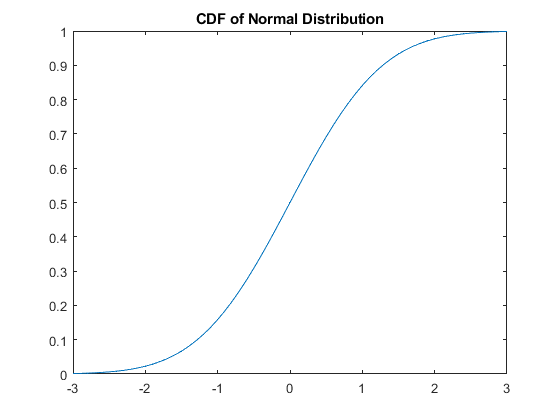

In [38]:
% Transformation in MATLAB
% Listing 7.2
% Last updated July 2020
%
%

x=-3:0.1:3;
plot(x,normcdf(x))
title("CDF of Normal Distribution")

In [39]:
% Various RNs in MATLAB
% Listing 7.4
% Last updated August 2016
%
%

rng default; % set seed

S=10;

rand(S,1)
randn(S,1)
trnd(4,S,1)


ans =

    0.8147
    0.9058
    0.1270
    0.9134
    0.6324
    0.0975
    0.2785
    0.5469
    0.9575
    0.9649


ans =

   -1.3499
    3.0349
    0.7254
   -0.0631
    0.7147
   -0.2050
   -0.1241
    1.4897
    1.4090
    1.4172


ans =

    1.2458
   -1.8803
    0.4892
    2.4722
    0.5898
    1.0088
    0.8056
   -0.2653
    0.2206
   -0.8372




In [40]:
% Price bond in MATLAB
% Listing 7.6
% Last updated July 2020
%
%

yield = [5.00 5.69 6.09 6.38 6.61...
         6.79 6.94 7.07 7.19 7.30]; % yield curve
T = length(yield); 
r=0.07;                             % initial yield rate
Par=10;                             % par value
coupon=r*Par;                       % coupon payments
cc=zeros(1,T)+coupon;               % vector of cash flows 
cc(T)=cc(T)+Par;                    % add par to cash flows
P=sum(cc./((1+yield./100).^(1:T)))  % calculate price


P =

    9.9132




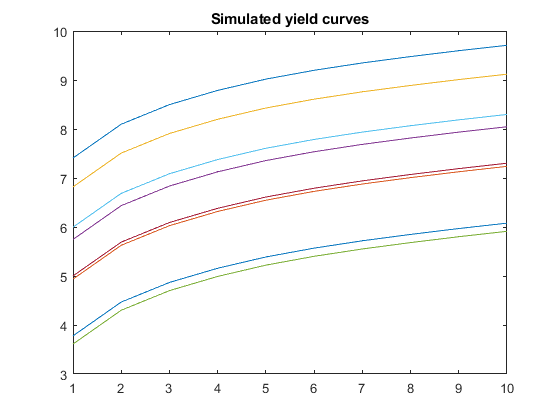

In [41]:
% Simulate yields in MATLAB
% Listing 7.8
% Last updated July 2020
%
%

randn('state',123);         % set the seed
sigma = 1.5;                % daily yield volatility
S = 8;                      % number of simulations
r = randn(1,S)*sigma;       % generate random numbers

ysim=nan(T,S);
for i=1:S
    ysim(:,i)=yield+r(i);
end
ysim=repmat(yield',1,S)+repmat(r,T,1);
plot(ysim)
title("Simulated yield curves")

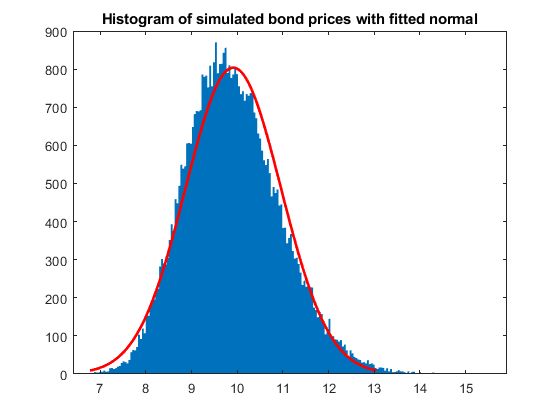

In [42]:
% Simulate bond prices in MATLAB
% Listing 7.10
% Last updated July 2020
%
%

SP = nan(S,1);
for s = 1:S                                        % S simulations
    SP(s) = sum(cc./(1+ysim(:,s)'./100).^((1:T)));
end
SP = SP-(mean(SP) - P);                            % correct for mean
bar(SP)

S = 50000;
rng("default")
r = randn(S,1) * sigma;
ysim = nan(T,S);
for i = 1:S
    ysim(:,i) = yield' + r(i);
end

SP = nan(S,1);
for i = 1:S
    SP(i) = sum(cc./(1+ysim(:,i)'./100).^((1:T)));
end

SP = SP  - (mean(SP)-P);

histfit(SP)
title("Histogram of simulated bond prices with fitted normal")

In [43]:
% Black-Scholes valuation in MATLAB
% Listing 7.12
% Last updated July 2020
%
%

P0 = 50;                      % initial spot price
sigma = 0.2;                  % annual volatility
r = 0.05;                     % annual interest
T = 0.5;                      % time to expiration
X = 40;                       % strike price
f = bs(X,P0,r,sigma,T)        % analytical call price

%% This calculation uses the Black-Scholes pricing function (Listing 6.1/6.2)


f = 

  struct with fields:

     Call: 11.0873
      Put: 0.0997
    Delta: [1x1 struct]
    Gamma: 0.0107




In [44]:
% Black-Scholes simulation in MATLAB
% Listing 7.14
% Last updated July 2020
%
%

randn('state',0);            % set seed
S = 1e6;                     % number of simulations
ysim = randn(S,1)*sigma*sqrt(T)-0.5*T*sigma^2; % sim returns, lognorm corrected
F = P0*exp(r*T)*exp(ysim);   % sim future prices
SP = F-X;                    % payoff
SP(find(SP < 0)) = 0;        % set negative outcomes to zero
fsim = SP * exp(-r*T) ;      % discount
mean(fsim)                   % simulated price  


ans =

   11.0996




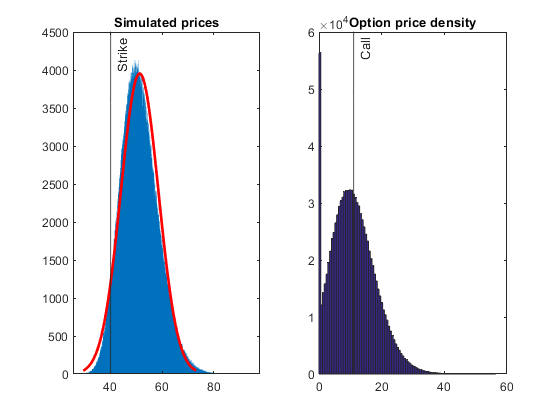

In [45]:
% Option density plots in MATLAB
% Listing 7.16
% Last updated July 2020
%
%

subplot(1,2,1)
histfit(F);
title("Simulated prices");
xline(X, 'LineWidth', 1, 'label', 'Strike');

subplot(1,2,2)
hist(fsim,100);
title("Option price density");
xline(mean(fsim), 'LineWidth', 1, 'label', 'Call');

In [46]:
% Simulate VaR in MATLAB
% Listing 7.18
% Last updated 2011
%
%

randn('state',0);   % set seed
S = 1e7;            % number of simulations
s2 = 0.01^2;        % daily variance
p = 0.01;           % probability
r = 0.05;           % annual riskfree rate
P = 100;            % price today
ysim = randn(S,1)*sqrt(s2)+r/365-0.5*s2; % sim returns
Psim = P*exp(ysim);  % sim future prices 
q = sort(Psim-P);  % simulated P/L
VaR1 = -q(S*p)


VaR1 =

    2.2906




In [47]:
% Simulate option VaR in MATLAB
% Listing 7.20
% Last updated 2011
%
%

T = 0.25;                           % time to expiration
X = 100;                            % strike price
sigma = sqrt(s2*250);               % annual volatility
f = bs(X,P,r,sigma,T);              % analytical call price
fsim=bs(X,Psim,r,sigma,T-(1/365));  % sim option prices
q = sort(fsim.Call-f.Call);         % simulated P/L
VaR2 = -q(p*S)


VaR2 =

    1.2150




In [48]:
% Example 7.3 in MATLAB
% Listing 7.22
% Last updated 2011
%
%

X1 = 100;
X2 = 110;
f1 = bs(X1,P,r,sigma,T);
f2 = bs(X2,P,r,sigma,T);  
f1sim=bs(X1,Psim,r,sigma,T-(1/365));
f2sim=bs(X2,Psim,r,sigma,T-(1/365));
q = sort(f1sim.Call+f2sim.Put+Psim-f1.Call-f2.Put-P); 
VaR3 = -q(p*S)


VaR3 =

    1.4951




In [49]:
% Simulated two-asset returns in MATLAB
% Listing 7.24
% Last updated 2011
%
%

randn('state',12)                 % set seed
mu = [r/365 r/365]';              % return mean
Sigma=[0.01 0.0005; 0.0005 0.02]; % covariance matrix
y = mvnrnd(mu,Sigma,S);           % simulated returns

In [50]:
% Two-asset VaR in MATLAB
% Listing 7.26
% Last updated 2011
%
%

K = 2; 
P = [100 50]';                        % prices
x = [1 1]';                           % number of assets
Port = P'*x;                          % portfolio at t
Psim = repmat(P,1,S)' .*exp(y);       % simulated prices
PortSim=Psim * x;                     % simulated portfolio value
q = sort(PortSim-Port);               % simulated P/L
VaR4 = -q(S*p)


VaR4 =

   25.9700




In [51]:
% A two-asset case in MATLAB with an option
% Listing 7.28
% Last updated 2011
%
%

f = bs(P(2),P(2),r,sigma,T);
fsim=bs(P(2),Psim(:,2),r,sigma,T-(1/365));
q = sort(fsim.Call+Psim(:,1)-f.Call-P(1)); 
VaR5 = -q(p*S)


VaR5 =

   20.8125




<a id='8'></a>
***

# Chapter 8: Backtesting and Stress Testing

-  8.1/8.2: Loading hypothetical stock prices, converting to returns
-  8.3/8.4: Setting up backtest 
-  8.5/8.6: Running backtest for EWMA/MA/HS/GARCH VaR
-  8.7/8.8: Backtesting analysis for EWMA/MA/HS/GARCH VaR
-  8.9/8.10: Bernoulli coverage test
-  8.11/8.12: Independence test
-  8.13/8.14: Running Bernoulli/Independence test on backtests
-  8.15/8.16: Running backtest for EWMA/HS ES
-  8.17/8.18: Backtesting analysis for EWMA/HS ES

In [52]:
% Load data in MATLAB
% Listing 8.2
% Last updated August 2016
%
%

price = csvread('index.csv', 1, 0);

y=diff(log(price)); % get returns 

In [53]:
% Set backtest up in MATLAB
% Listing 8.4
% Last updated July 2020
%
%

T = length(y);  % number of obs for return y
WE = 1000;      % estimation window length 
p = 0.01;       % probability
l1 = ceil(WE*p) ;     % HS observation
value = 1;      % portfolio value
VaR = NaN(T,4); % matrix for forecasts
%% EWMA setup
lambda = 0.94;
s11 = var(y);
for t = 2:WE
    s11=lambda*s11+(1-lambda)*y(t-1)^2;
end

In [ ]:
% Running backtest in MATLAB
% Listing 8.6
% Last updated June 2018
%
%

for t = WE+1:T
    t1 = t-WE;          % start of the data window
    t2 = t-1;           % end of data window
    window = y(t1:t2) ; % data for estimation
    s11 = lambda*s11  + (1-lambda)*y(t-1)^2;
    VaR(t,1) = -norminv(p) * sqrt(s11)  *value; % EWMA
    VaR(t,2) = -std(window)*norminv(p)*value; % MA
    ys = sort(window);
    VaR(t,3) = -ys(l1)*value; % HS
    [par,ll,ht]=tarch(window,1,0,1);
    h=par(1)+par(2)*window(end)^2+par(3)*ht(end);
    VaR(t,4) = -norminv(p)*sqrt(h)*value; % GARCH(1,1)
end

    "EWMA"    "Violation Ratio:"    "0"    "Volatility:"    <missing>

    "MA"    "Violation Ratio:"    "0"    "Volatility:"    <missing>

    "HS"    "Violation Ratio:"    "0"    "Volatility:"    <missing>

    "GARCH"    "Violation Ratio:"    "0"    "Volatility:"    <missing>




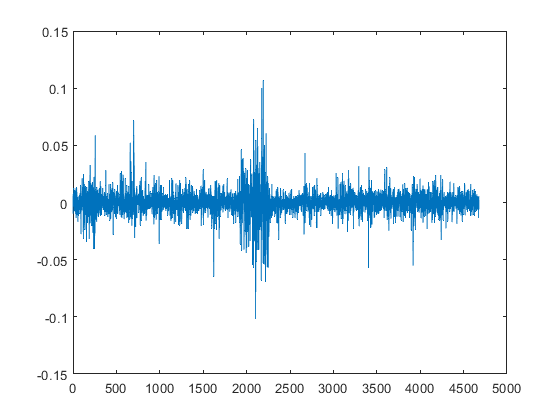

In [54]:
% Backtesting analysis in MATLAB
% Listing 8.8
% Last updated July 2020
%
%

names = ["EWMA", "MA", "HS", "GARCH"];
for i=1:4
    VR = length(find(y(WE+1:T)<-VaR(WE+1:T,i)))/(p*(T-WE)); 
    s = std(VaR(WE+1:T,i));         
    disp([names(i), "Violation Ratio:", VR, "Volatility:", s])          
end
plot([y(WE+1:T) VaR(WE+1:T,:)])

In [ ]:
% Bernoulli coverage test in MATLAB
% Listing 8.10
% Last updated July 2020
%
%

%% To run this code block in Jupyter notebook:
%% delete all lines above the line with bern_test.m, then run





%%file bern_test.m

function res=bern_test(p,v)
    lv = length(v);
    sv = sum(v);
    al = log(p)*sv + log(1-p)*(lv-sv);
    bl = log(sv/lv)*sv + log(1-sv/lv)*(lv-sv)
	res=-2*(al-bl);
end	

In [ ]:
% Independence test in MATLAB
% Listing 8.12
% Last updated July 2020
%
%

%% To run this code block in Jupyter notebook:
%% delete all lines above the line with ind_test.m, then run





%%file ind_test.m

function res=ind_test(V)
	T=length(V);
	J=zeros(T,4);
	for i = 2:T
		J(i,1)=V(i-1)==0 & V(i)==0;
		J(i,2)=V(i-1)==0 & V(i)==1;
		J(i,3)=V(i-1)==1 & V(i)==0;
		J(i,4)=V(i-1)==1 & V(i)==1;
	end	
	V_00=sum(J(:,1));
	V_01=sum(J(:,2));
	V_10=sum(J(:,3));
	V_11=sum(J(:,4));
	p_00=V_00/(V_00+V_01);
	p_01=V_01/(V_00+V_01);
	p_10=V_10/(V_10+V_11);
	p_11=V_11/(V_10+V_11);
	hat_p=(V_01+V_11)/(V_00+V_01+V_10+V_11);
    
    al = log(1-hat_p)*(V_00+V_10) + log(hat_p)*(V_01+V_11);
    bl = log(p_00)*V_00 + log(p_01)*V_01 + log(p_10)*V_10 + log(p_11)*V_11;
	res= -2*(al-bl);
end

In [55]:
% Backtesting S&P 500 in MATLAB
% Listing 8.14
% Last updated July 2020
%
%

names = ["EWMA", "MA", "HS", "GARCH"];
ya=y(WE+1:T);
VaRa=VaR(WE+1:T,:);
for i=1:4
	q=find(y(WE+1:T)<-VaR(WE+1:T,i));
	v=VaRa*0;
	v(q,i)=1;
	ber=bern_test(p,v(:,i));
	in=ind_test(v(:,i));
	disp([names(i), "Bernoulli Statistic:", ber, "P-value:", 1-chi2cdf(ber,1),...
    "Independence Statistic:", in, "P-value:", 1-chi2cdf(in,1)])
end


bl =

   NaN

    "EWMA"    "Bernoulli Statis..."    <missing>    "P-value:"    <missing>    "Independence Sta..."    <missing>    "P-value:"    <missing>


bl =

   NaN

    "MA"    "Bernoulli Statis..."    <missing>    "P-value:"    <missing>    "Independence Sta..."    <missing>    "P-value:"    <missing>


bl =

   NaN

    "HS"    "Bernoulli Statis..."    <missing>    "P-value:"    <missing>    "Independence Sta..."    <missing>    "P-value:"    <missing>


bl =

   NaN

    "GARCH"    "Bernoulli Statis..."    <missing>    "P-value:"    <missing>    "Independence Sta..."    <missing>    "P-value:"    <missing>




In [56]:
% Backtest ES in MATLAB
% Listing 8.16
% Last updated 2011
%
%

VaR = NaN(T,2);  % VaR forecasts for 2 models 
ES = NaN(T,2);   % ES forecasts for 2 models 
for t = WE+1:T
    t1 = t-WE; 
    t2 = t-1; 
    window = y(t1:t2) ;
    
    s11 = lambda * s11  + (1-lambda) * y(t-1)^2; 
    VaR(t,1) = -norminv(p) * sqrt(s11)  *value; % EWMA
    ES(t,1) = sqrt(s11) * normpdf(norminv(p)) / p;

    ys = sort(window);
    VaR(t,2) = -ys(l1) * value;          % HS
    ES(t,2) = -mean(ys(1:l1)) * value;  
end

In [57]:
% ES in MATLAB
% Listing 8.18
% Last updated July 2020
%
%

names = ["EWMA", "HS"];
VaRa = VaR(WE+1:T,:);
ESa = ES(WE+1:T,:);
for i = 1:2
	q = find(ya <= -VaRa(:,i));
	nES = mean(ya(q) ./ -ESa(q,i));
	disp([names(i), nES])
end

    "EWMA"    "1.223"

    "HS"    "1.0537"




<a id='9'></a>
***

# Chapter 9: Extreme Value Theory

-  9.1/9.2: Calculation of tail index from returns

In [58]:
% Hill estimator in MATLAB
% Listing 9.2
% Last updated 2011
%
%

ysort = sort(y);                            % sort the returns
CT = 100;                                   % set the threshold
iota = 1/mean(log(ysort(1:CT)/ysort(CT+1))) % get the tail index

% END


iota =

    2.6297


